Transfer learning is an important topic in DL where the pretrained models are used to build usecases.

In this project, a pretrained model called Mobilenet V2 is used. It is trained on images of cats and dogs intern the model tells us whether the given image is cat or dog.

What is transfer learning?
Transfer learning is a deep learning technique where we use a pre-trained model.This pre-trained model is trained for one task and can be re-trained for a similar task with smaller dataset.

Transfer learning gives higher accuracy when compared to training models from scratch.

Ex: Image recognition model pre-trained on one dataset can be used for a image recognition of other dataset.

Examples of pre-trained models:
1. VGG-16   -- famous for image recognition
2. ResNet50
3. Inceptionv3
4. MobileNet V2  -- A lightweight model
5. YOLO -- You Only Look Once --- used for object detection


Workflow:

Dataset --> Image Processing --> Train Test Split --> Pretrained model --> prediction

In [1]:
!pip install kaggle

In [6]:
#Configuring the path of kaggle.json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
# importing Dog Vs Cat dataset from kaggle

#kaggle api

!kaggle competitions download -c dogs-vs-cats

 98% 794M/812M [00:08<00:00, 195MB/s]
100% 812M/812M [00:09<00:00, 94.1MB/s]


The above code is from dataset API

In [9]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [10]:
#Extracting the compressed file or dataset

from zipfile import ZipFile

dataset = "/content/dogs-vs-cats.zip"

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [11]:
#Extraction for train.zip

from zipfile import ZipFile

dataset = "/content/train.zip"

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [12]:
import os

#counting the number of files in train folder

path, dirs, files = next(os.walk('/content/train'))

file_count = len(files)

print("Number of images: ", file_count)

Number of images:  25000


Here, all the 25000 data points are not used for trained. Since we are using a pretrained model, a sample of the considered dataset is taken.


In [14]:
# Printing the name of images

file_names = os.listdir("/content/train")

print(file_names)

['cat.1956.jpg', 'dog.11305.jpg', 'cat.7215.jpg', 'cat.6495.jpg', 'cat.1668.jpg', 'dog.10040.jpg', 'cat.2023.jpg', 'dog.10144.jpg', 'dog.3916.jpg', 'cat.10760.jpg', 'cat.10868.jpg', 'dog.5933.jpg', 'cat.2223.jpg', 'cat.8568.jpg', 'cat.7844.jpg', 'cat.6587.jpg', 'cat.2725.jpg', 'dog.2414.jpg', 'dog.3237.jpg', 'cat.10896.jpg', 'cat.1214.jpg', 'dog.11084.jpg', 'dog.4566.jpg', 'cat.5974.jpg', 'cat.2305.jpg', 'dog.6452.jpg', 'dog.9895.jpg', 'cat.1187.jpg', 'dog.2975.jpg', 'cat.1907.jpg', 'cat.7279.jpg', 'cat.8246.jpg', 'cat.4495.jpg', 'dog.2343.jpg', 'cat.638.jpg', 'cat.6514.jpg', 'dog.12135.jpg', 'dog.8957.jpg', 'dog.3512.jpg', 'cat.3576.jpg', 'dog.8997.jpg', 'dog.4333.jpg', 'dog.4332.jpg', 'dog.2882.jpg', 'cat.5855.jpg', 'cat.9704.jpg', 'cat.5651.jpg', 'dog.6943.jpg', 'cat.12236.jpg', 'dog.301.jpg', 'dog.6612.jpg', 'cat.2945.jpg', 'cat.2148.jpg', 'cat.2938.jpg', 'cat.168.jpg', 'dog.1481.jpg', 'cat.2537.jpg', 'dog.3095.jpg', 'cat.11897.jpg', 'cat.3740.jpg', 'cat.2083.jpg', 'cat.7792.jpg', 

In [17]:
# Importing the dependencies

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

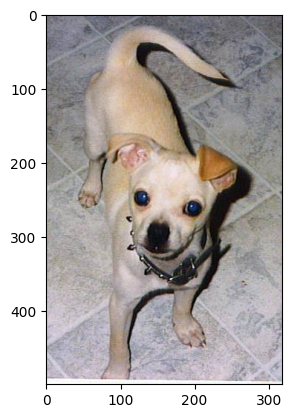

In [19]:
# Displaying the images of dogs and cats

img = mpimg.imread('/content/train/dog.10040.jpg')
imgplot = plt.imshow(img)
plt.show()

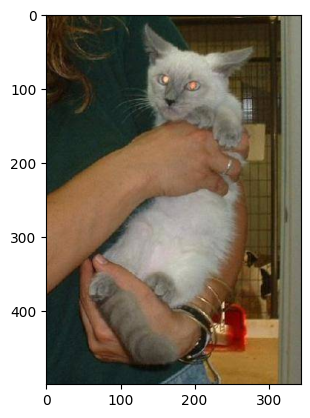

In [20]:
img = mpimg.imread('/content/train/cat.6495.jpg')
imgplot = plt.imshow(img)
plt.show()

Here all the images are of different size. Here we are going to use MobileNet V2 model which accepts images of size 224 * 224.

In [24]:
file_names = os.listdir('/content/train')

for i in range(5):

  print(file_names[i])

  name = file_names[i]
  print(name[0:3]) # prints the first three letters of the file_names


cat.1956.jpg
cat
dog.11305.jpg
dog
cat.7215.jpg
cat
cat.6495.jpg
cat
cat.1668.jpg
cat


In [25]:
file_names = os.listdir('/content/train')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print("Number of dog images: ", dog_count)
print("Number of cat images: ", cat_count)

Number of dog images:  12500
Number of cat images:  12500


In [26]:
# Resizing all the images
# creating a new directory for resized images

os.mkdir("/content/image resized")


In [27]:
original_folder = "/content/train/"

resized_folder = "/content/image resized/"

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImagePath = resized_folder+filename
  img.save(newImagePath)

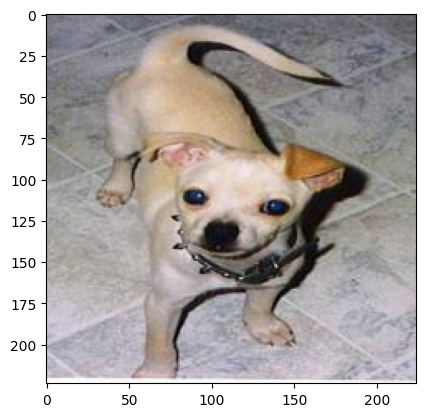

In [28]:
# Displaying the resized images of dogs and cats

img = mpimg.imread('/content/image resized/dog.10040.jpg')
imgplot = plt.imshow(img)
plt.show()

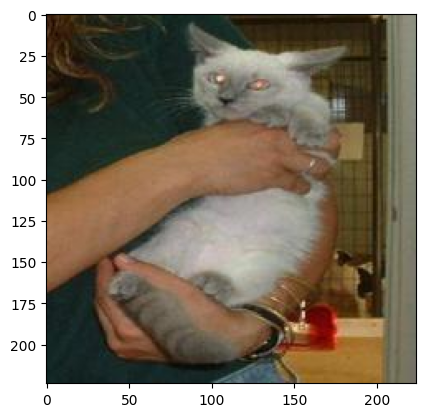

In [29]:
img = mpimg.imread('/content/image resized/cat.6495.jpg')
imgplot = plt.imshow(img)
plt.show()

In [30]:
# Creating labels for resized images of dogs and cats

#cat --> 0, dog --> 1

# Creating a for loop to assign labels to the images

filenames = os.listdir('/content/image resized/')

labels = []

for i in range(2000):
  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [32]:
print(filenames[0:5])

['cat.1956.jpg', 'dog.11305.jpg', 'cat.7215.jpg', 'cat.6495.jpg', 'cat.1668.jpg']


In [33]:
print(len(filenames))

2000


In [34]:
print(labels[0:5])
print(len(labels))

[0, 1, 0, 0, 0]
2000


In [35]:
# Counting the images of dogs and cats out of 2000 images

values, counts = np.unique(labels, return_counts = True)
print(values)
print(counts)

[0 1]
[ 999 1001]


Above values show that the distribution is balanced.

In [36]:
# Converting all the resized images to numpy arrays

import cv2
import glob


In [37]:
image_directory = "/content/image resized/"

image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [38]:
print(dog_cat_images)

[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[208 197 193]
   [206 195 191]
   [205 193 191]
   ...
   [ 95 165 182]
   [ 90 160 177]
   [ 94 166 183]]

  [[213 202 198]
   [212 201 197]
   [210 198 196]
   ...
   [ 99 170 184]
   [ 99 169 186]
   [107 180 194]]

  [[215 204 200]
   [213 202 198]
   [211 199 197]
   ...
   [104 176 188]
   [105 176 190]
   [114 188

In [39]:
print(type(dog_cat_images))

<class 'numpy.ndarray'>


In [40]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [41]:
X = dog_cat_images
Y = np.asarray(labels)

In [42]:
# Train test split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [43]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [44]:
# Scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [45]:
print(X_train_scaled)

[[[[0.32941176 0.34509804 0.41960784]
   [0.32941176 0.34509804 0.41960784]
   [0.33333333 0.34901961 0.42352941]
   ...
   [0.29411765 0.32156863 0.42745098]
   [0.30588235 0.33333333 0.43921569]
   [0.31372549 0.34117647 0.44705882]]

  [[0.3372549  0.35294118 0.42745098]
   [0.3372549  0.35294118 0.42745098]
   [0.3372549  0.35294118 0.42745098]
   ...
   [0.29411765 0.32156863 0.42745098]
   [0.30588235 0.33333333 0.43921569]
   [0.31372549 0.34117647 0.44705882]]

  [[0.34117647 0.35686275 0.43137255]
   [0.34509804 0.36078431 0.43529412]
   [0.34509804 0.36078431 0.43529412]
   ...
   [0.29411765 0.32156863 0.42745098]
   [0.30588235 0.33333333 0.43921569]
   [0.31372549 0.34117647 0.44705882]]

  ...

  [[0.21176471 0.23137255 0.22745098]
   [0.21176471 0.23137255 0.22745098]
   [0.20784314 0.22745098 0.22352941]
   ...
   [0.70196078 0.72941176 0.80784314]
   [0.70196078 0.7254902  0.81568627]
   [0.70588235 0.72941176 0.81960784]]

  [[0.21176471 0.23137255 0.22745098]
   [0.2

In [46]:
# Building the neural network

import tensorflow as tf
import tensorflow_hub as hub

In [47]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape = (224, 224, 3), trainable = False)

In [48]:
num_of_classes = 2

model = tf.keras.Sequential([

                             pretrained_model,
                             tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [50]:
model.compile(

              optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy']
)

In [51]:
model.fit(X_train_scaled, Y_train, epochs = 5)

Epoch 1/5
50/50 [==============================] - 82s 1s/step - loss: 0.2169 - accuracy: 0.9125
Epoch 2/5
50/50 [==============================] - 88s 2s/step - loss: 0.0724 - accuracy: 0.9731
Epoch 3/5
50/50 [==============================] - 78s 2s/step - loss: 0.0541 - accuracy: 0.9794
Epoch 4/5
50/50 [==============================] - 66s 1s/step - loss: 0.0422 - accuracy: 0.9850
Epoch 5/5
50/50 [==============================] - 68s 1s/step - loss: 0.0349 - accuracy: 0.9919


In [52]:
score, accuracy = model.evaluate(X_test_scaled, Y_test)
print("Test loss: ", score)
print("Test accuracy: ", accuracy)

13/13 [==============================] - 25s 2s/step - loss: 0.0624 - accuracy: 0.9700
Test loss:  0.06244998425245285
Test accuracy:  0.9700000286102295


Path of the image to be predicted: /content/dog.jpg


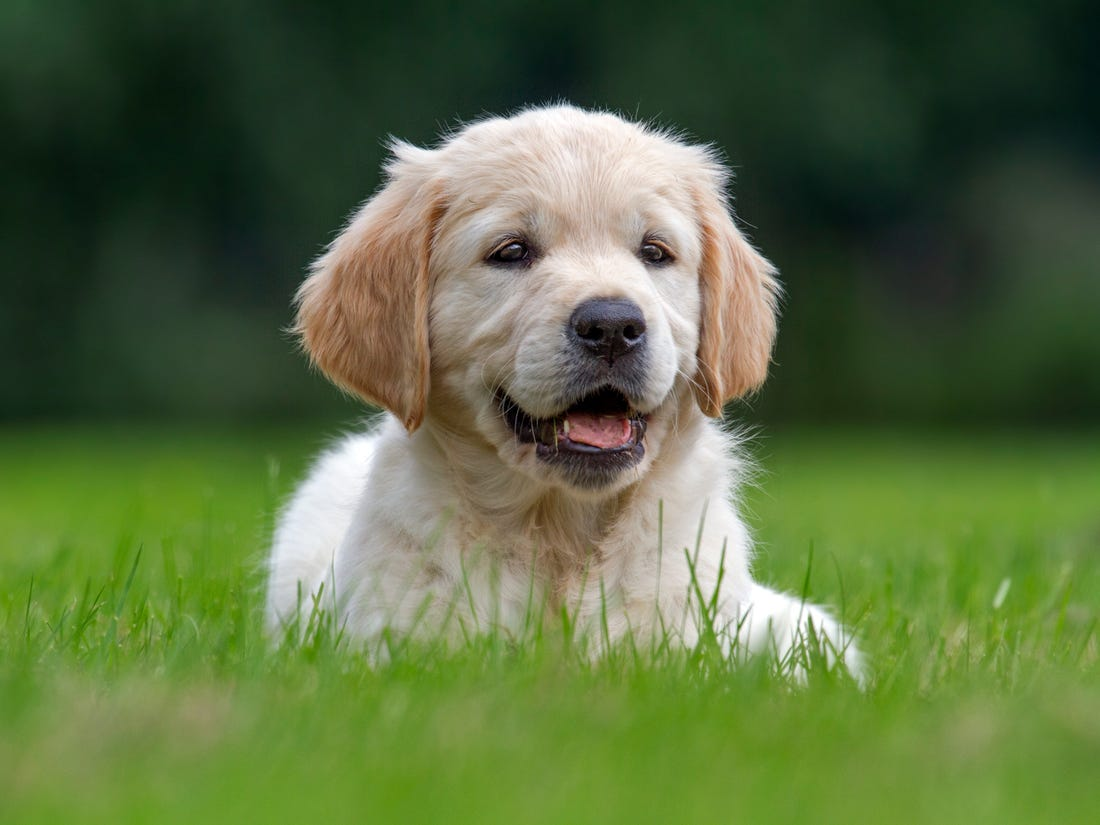

1/1 [==============================] - 0s 91ms/step
[[-4.7763433  3.8673744]]
1
The image represents a Dog


In [54]:
# Building a predictive system

input_image_path = input("Path of the image to be predicted: ")

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (224, 224))

input_image_scaled = input_image_resized/255

image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])  # 1 means we are giving one input only we are predicting for one data point only

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print("The image represents a Cat")

else:
  print("The image represents a Dog")

In [55]:
## Build an UI using flask or streamlit so that the user can simply upload an image for classification